## Author: Tanvi Bhagat

<h2>Dataset Information:</h2>
<p>- This data set consists of Placement data of students of MBA college from Bangalore. It includes secondary and higher secondary school percentage and specialization.</p>
<p>- It also includes degree specialization, type and Work experience and salary offers to the placed students.</p>

<h2>Exploratory Data Analysis (EDA)</h2>
<p> The data available on hand makes it possible to ask questions such as:</p>
<ul>
     <li>Placed vs Not Placed?</li>
    <li>Does the board of education affect placements?</li>
    <li>Does the type of board have any effect on the salary offered?</li>
    <li>Is one stream inherently better than the other?</li>
    <li>Does gender affect placements?</li>
    <li>Does a specialisation affect placement?</li>
    <li>What is the effect of employee ability test on placements and on salary?</li>
  
</ul>

<h2>Models Implemented</h2>
<ul>
    <li><b>Logistic Regression without feature selection</b></li>
    <ul>Used to solve regression and classification problems and can handle colinearity better than logistic regression
    </ul>
    <li><b>Logistic Regression after feature selection</b></li>
    <li><b>Decision Tree Classifier</b></li>
    <li><b>Random Forest Classifier</b></li>

### Importing Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab 
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h3>Acquire and load the data</h3>

In [2]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vTq0-s1Bt-PbXFHu8D5Fb_i0PY8RweT1LfcmQ38jvshshbrh6HW6vBWMG1cBso1deJ0bsC4qbclHTc1/pub?gid=1715407726&single=true&output=csv"
placement= pd.read_csv(data_path)

In [3]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
placement.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
placement.shape

(215, 15)

#### Checking datatypes and columns

In [6]:
placement.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [7]:
placement.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

### Dataset Information 

#### sl_no : Serial Number
#### gender : Gender- Male='M',Female='F'
#### ssc_p : Secondary Education percentage- 10th Grade
#### ssc_b : Board of Education- Central/ Others
#### hsc_p : Higher Secondary Education percentage- 12th Grade
#### hsc_b : Board of Education- Central/ Others
#### hsc_s : Specialization in Higher Secondary Education
#### degree_p : Degree Percentage
#### degree_t : Under Graduation(Degree type)- Field of degree education
#### workex : Work Experience
#### etest_p : Employability test percentage ( conducted by college)
#### specialisation : Post Graduation(MBA)- Specialization
#### mba_p : MBA percentage
#### status : Status of placement- Placed/Not placed
#### salary : Salary offered by corporate to candidates

In [8]:
placement['degree_t'].unique

<bound method Series.unique of 0       Sci&Tech
1       Sci&Tech
2      Comm&Mgmt
3       Sci&Tech
4      Comm&Mgmt
         ...    
210    Comm&Mgmt
211     Sci&Tech
212    Comm&Mgmt
213    Comm&Mgmt
214    Comm&Mgmt
Name: degree_t, Length: 215, dtype: object>

In [9]:
placement['specialisation'].unique

<bound method Series.unique of 0       Mkt&HR
1      Mkt&Fin
2      Mkt&Fin
3       Mkt&HR
4      Mkt&Fin
        ...   
210    Mkt&Fin
211    Mkt&Fin
212    Mkt&Fin
213     Mkt&HR
214     Mkt&HR
Name: specialisation, Length: 215, dtype: object>

#### Checking Quantitative Variables

In [10]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


#### It seems that we have some big outliers in the salary column. The mean is about 2.9 lakhs with a standard deviation of about 90,000 but we have some salary that is over 9 Lakhs, which is more than 6 standard deviations away from the mean! Looks like we have some missing values in the "salary column". This is probably for the students who were not placed.

#### Countplot of few variables

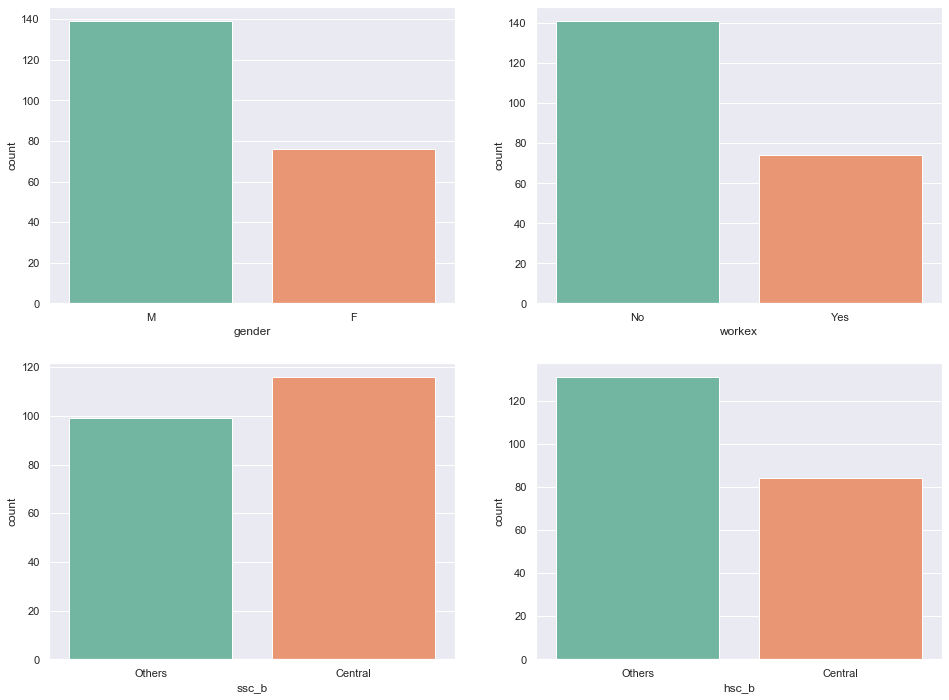

In [11]:
sns.set(palette='Set2')
fig, a1 = plt.subplots(2, 2,figsize=(16,12))
sns.countplot(x = "gender", data = placement, ax = a1[0,0])
sns.countplot(x = "workex", data = placement, ax = a1[0,1])
sns.countplot(x = "ssc_b", data = placement, ax = a1[1,0])
sns.countplot(x = "hsc_b", data = placement, ax = a1[1,1])
plt.show()    

There is a majority of male students in this degree.


### Placed vs Not Placed?

In [12]:
placement['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

#### Out of 215 students 148 students got placed

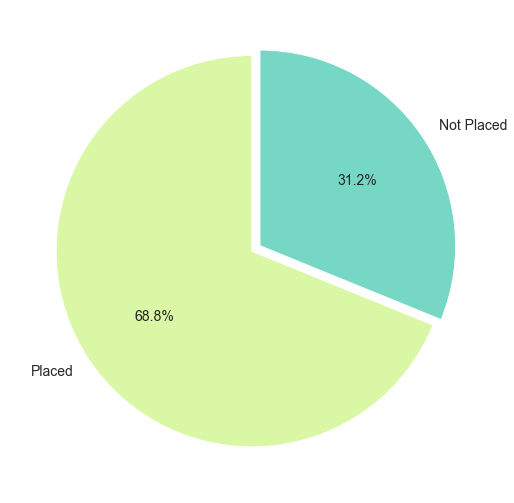

In [13]:
plt.rcParams['figure.figsize'] = 9,9
labels = placement['status'].value_counts().index.tolist()
sizes = placement['status'].value_counts().tolist()
explode = (0,0.050)
#Coloring pie chart
colors = ['#DAF7A6', '#76D7C4']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14} )

plt.show()

#### The university has a placement rate of 68.84%.

### Does the board of education affect placements?

In [14]:
# Create filter for SSC Central board 
ssc_central = placement.ssc_b == "Central"

# Create filter for HSC Central board 
hsc_central = placement.hsc_b == "Central"

both = ssc_central & hsc_central
neither = ~ssc_central & ~hsc_central

placement.groupby(["ssc_b", "hsc_b"]).status.value_counts().reset_index(name="count")

,ssc_b,hsc_b,status,count
0,Central,Central,Placed,53
1,Central,Central,Not Placed,24
2,Central,Others,Placed,25
3,Central,Others,Not Placed,14
4,Others,Central,Placed,4
5,Others,Central,Not Placed,3
6,Others,Others,Placed,66
7,Others,Others,Not Placed,26


### Vizualization of board vs placement rate 

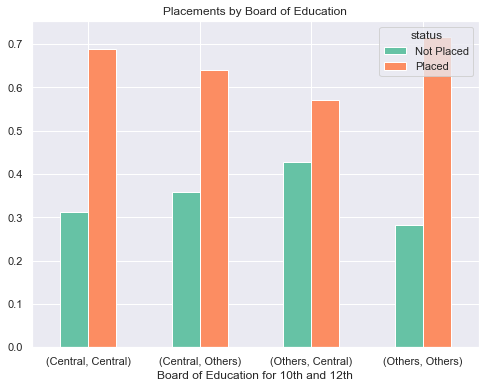

In [15]:
board = placement.groupby(["ssc_b", "hsc_b"]).status.value_counts(normalize=True).unstack(2)
board.plot.bar(title = "Placements by Board of Education", rot = 0, figsize = (8,6)).set_xlabel("Board of Education for 10th and 12th");

<p>=>From the above plots, it might seem that those who took a combination of Central and Others between their 10th and 12th grades were less likely to get placed than those that took Central or Others consistently. </p>
<p>=>However, looking at the number of samples in each of these groupings, we see that (Others, Central) and (Central, Others) have significantly fewer samples than the other two. </p>
<p>=> For our analysis, we will focus on (Central, Central) and (Others, Others) and see if one has any noticeable advantages over the other.</p>


### Exploring Board vs Salary


#### From the above graph, it seems that the choice of board doesnt seem to particularly increase one's chances of getting placed but maybe it has a role to play in determining ones salary? Let's check!

In [16]:
placement.groupby('ssc_b').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
ssc_b,,,,,,,,
Central,78.0,288166.666667,109534.601859,200000.0,240000.0,260000.0,300000.0,940000.0
Others,70.0,289200.000000,72238.453769,200000.0,240000.0,265000.0,300000.0,500000.0


<p>=>While the salaries for Central board students have outliers that are spread out further, the secondary school board does not have an effect on the salaries. </p>
<p>=> Highest salary offered to a Central board student is ₹9,40,000 whereas it is ₹5,00,000 for a non-Central board student. </p>

In [17]:
placement.groupby('hsc_b').describe()['salary']

,count,mean,std,min,25%,50%,75%,max
hsc_b,,,,,,,,
Central,57.0,289543.859649,114227.384472,200000.0,240000.0,260000.0,300000.0,940000.0
Others,91.0,288098.901099,78399.695995,200000.0,240000.0,265000.0,300000.0,650000.0


### Plotting Board vs Salary

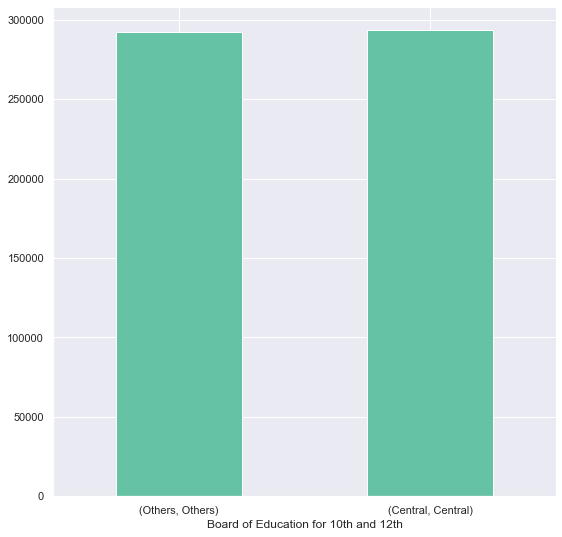

In [18]:

salary_by_board = placement[both | neither].groupby(["ssc_b", "hsc_b"]).salary.mean().sort_values()
salary_by_board.plot.bar(rot=0).set_xlabel("Board of Education for 10th and 12th");

<p>=>These two groups seem to have about the same average salary. If the board did indeed matter, we would expect one group to have significantly higher salary than the other. </p>
 <p>=>In case of the number of placed themselves, the (others, others) group does seem to have slightly higher chances of placements but this could be attributed to the difference in sample counts. </p>

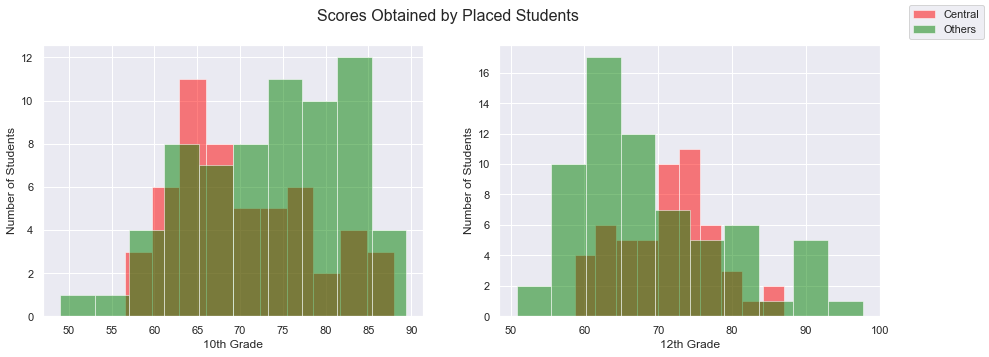

In [19]:
# Creating a filter for placed students 
placed = placement["status"] == "Placed"

# Plotting distribution of scores for placed students in Central and Others
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (15,5))

axes[0].hist(placement[both & placed].ssc_p, alpha = 0.5, color = "red",label = "Central");
axes[0].hist(placement[neither & placed].ssc_p, alpha = 0.5, label = "Others", color = "green");
axes[0].set_xlabel("10th Grade")
axes[0].set_ylabel("Number of Students")

axes[1].hist(placement[both & placed].hsc_p, alpha = 0.5, label = "Central", color="red");
axes[1].hist(placement[neither & placed].hsc_p, alpha = 0.5, label = "Others", color="green");
axes[1].set_xlabel("12th Grade")
axes[1].set_ylabel("Number of Students")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle("Scores Obtained by Placed Students", fontsize=16)
plt.show()



<p> 1.It seems that among the placed students, those from Central Board scored less in the 10th grade than their Others counterparts. </p>
<p> 2.This could be an indication of how the examinations in the central board tend to be more difficult resulting in a lower average score. </p>
<p> 3.However, the opposite seems to be true in the case of the 12th grade. Maybe the more rigorous process the students faced in their secondary schooling better prepared them for their 12th? </p>

### Is one stream inherently better than the other?

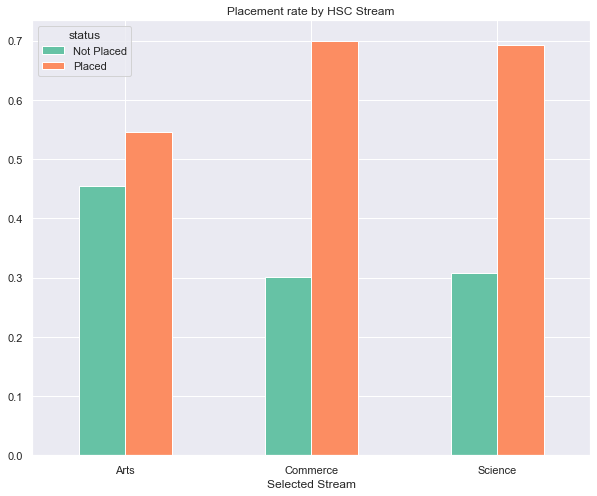

In [20]:
placement.groupby("hsc_s").status.value_counts(normalize=True).unstack(1).plot.bar( title = "Placement rate by HSC Stream", rot=0, figsize = (10,8)).set_xlabel("Selected Stream");

#### Arts does seem to be lagging behind in placements but then again it has significantly fewer samples than commerce and science. For our analysis, we will focus on only Science and Commerce, which from the looks of it, have near-identical placement rates. Maybe one stream is more likely to be offered a higher salary?


Text(0.5, 0, 'Selected Stream')

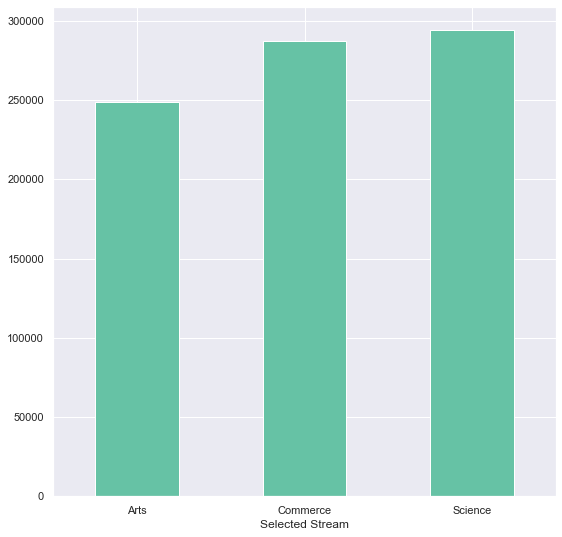

In [21]:
placement.groupby("hsc_s").salary.mean().plot.bar(rot=0).set_xlabel("Selected Stream")

<p> Even though the mean salary does look quite similar, maybe the difference lies in the distribution of jobs? Maybe commerce has more average-pay jobs while science has a mix of high and low pay? </p>

### Plotting Selected Stream Vs Salary

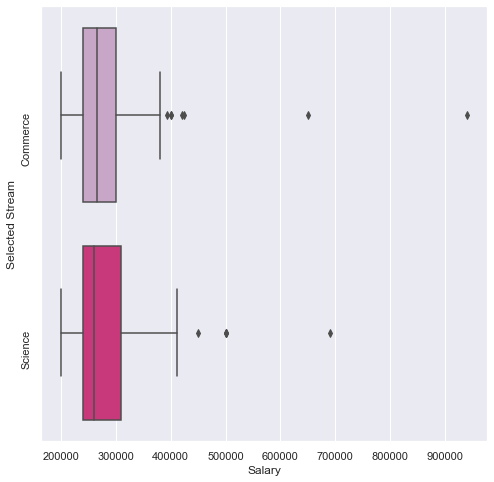

In [22]:
# Create filter for science
science = placement["hsc_s"] == "Science"

# Create a filter for commerce
commerce = placement["hsc_s"] == "Commerce"

# Plot Salary distribution by Stream
f , ax = plt.subplots(figsize=(8,8))
ax= sns.boxplot(x="salary", y="hsc_s", data =placement[science | commerce], palette = 'PuRd');
ax.set_yticklabels(ax.get_yticklabels(),rotation=90)
plt.ylabel("Selected Stream")
plt.xlabel("Salary")
plt.show()

#### Looks like both streams have about the same spread of salaries. 
#### There are some outliers in both cases and Science does seem to have an ever-so-slightly higher third quartile value. But not enough to make it significant.

### Does a particular specialisation has any effect on the salary offered after being placed?


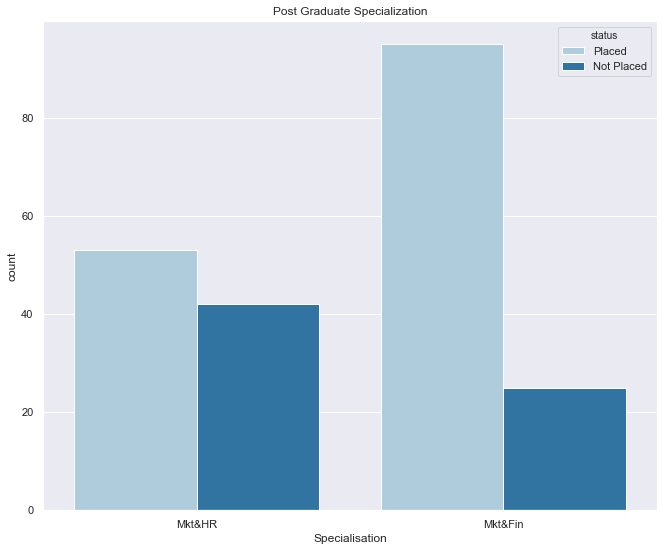

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')

sns.set(palette='Paired')

ax = sns.countplot(x="specialisation", data=placement, hue="status")
ax.set(xlabel='Specialisation')
plt.title('Post Graduate Specialization')
plt.show()   



#### Salary vs specialisation and degree

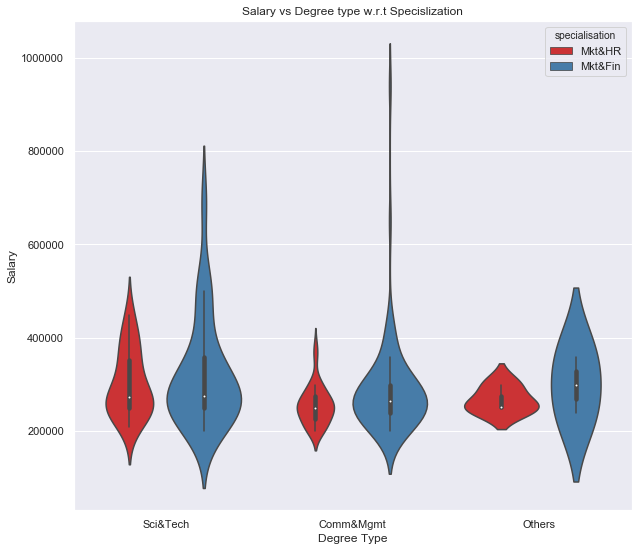

In [24]:
# Plotting Salary vs specialization and degree
plt.subplots(figsize=(10,9))
sns.violinplot(x="degree_t", y="salary", hue="specialisation", data=placement, scale="count", palette="Set1");
plt.title("Salary vs Degree type w.r.t Specislization")
plt.xlabel("Degree Type")
plt.ylabel("Salary")
plt.show()

<p> It seems as though the highest salaries that were offered were to students who pursued the Marketing & Finance specialisation after obtaining a UG degree in Commerce and Management. </p>
<p>However, these are clearly major outliers. It seems than in general, Students with a Science and Technology UG degree pursuring Mkt&Fin specialization were more likely to get higher paying jobs. </p>


### Does gender affect placements?

#### Do companies seem to discrimate between men and women when it comes to placements and salaries?

In [25]:
placement.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

Text(0, 0.5, 'Count')

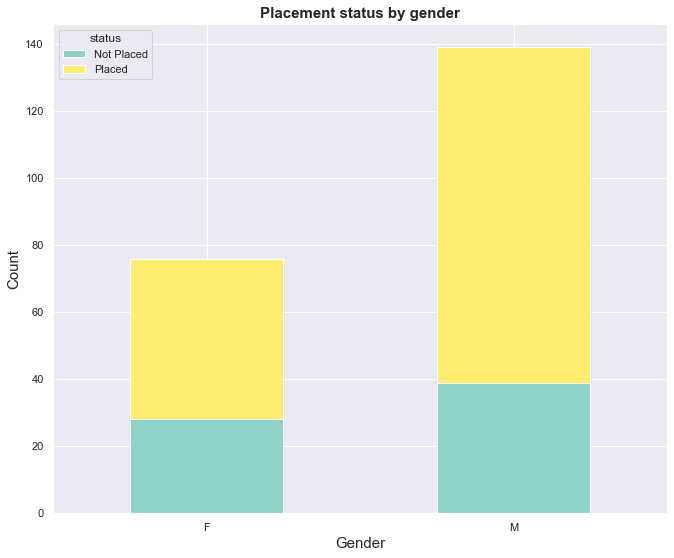

In [26]:
gen = placement.groupby([ 'gender', 'status']).size().unstack(fill_value=0)
gen.plot(kind='bar', stacked=True, cmap='Set3', figsize=(11,9))

plt.title('Placement status by gender', weight='bold',fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=15)

#### There does seem to be a general trend that men in this dataset have been paid higher than women. But we can also see that the dataset contains fewer samples of females than it does of males.

### What is the effect of employee ability test on placements and on salary?

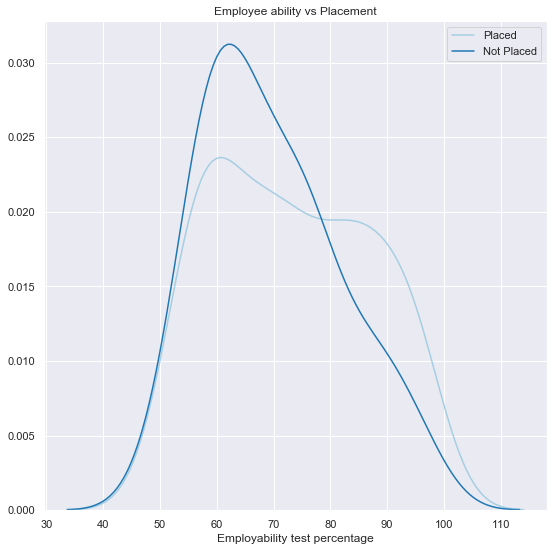

In [27]:
sns.kdeplot(placement.etest_p[ placement.status=="Placed"])
sns.kdeplot(placement.etest_p[ placement.status=="Not Placed"])
plt.title("Employee ability vs Placement")
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

#### High overlap -> It does not affect placement status much. More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

#### Does the test Score affect Salary?


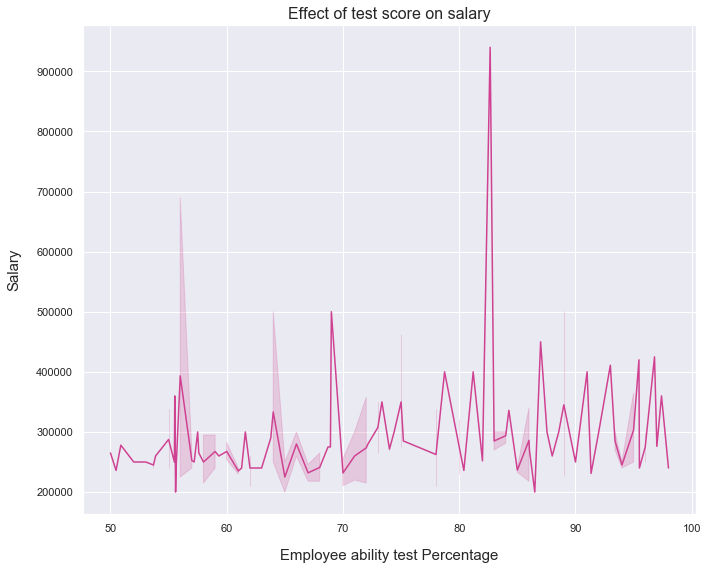

In [28]:
sns.set(palette='PiYG')
plt.figure(figsize=(11,9))
sns.lineplot("etest_p", "salary", data=placement)

plt.xlabel("Employee ability test Percentage", labelpad = 15, fontsize=15)
plt.ylabel("Salary", labelpad = 15, fontsize=15);
plt.title("Effect of test score on salary", fontsize = 16)
plt.show()

#### This feature surprisingly does not affect placements and salary much.

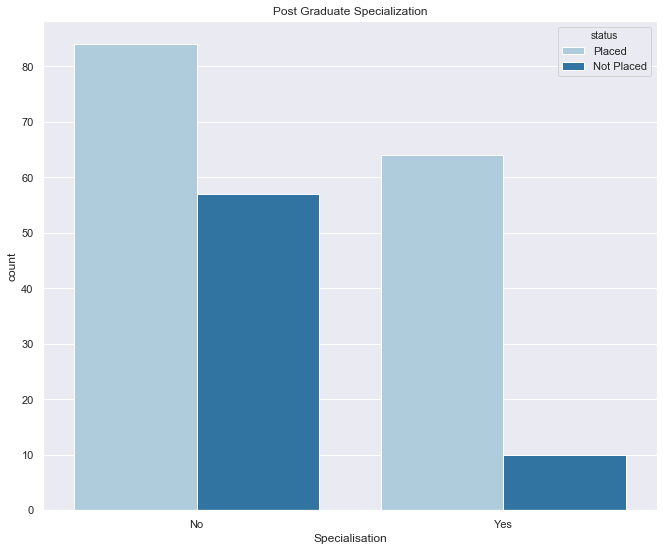

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,9))
sns.set(style='whitegrid')

sns.set(palette='Paired')

ax = sns.countplot(x="workex", data=placement, hue="status")
ax.set(xlabel='Specialisation')
plt.title('Post Graduate Specialization')
plt.show()   



### Data Exploration

In [30]:
df_placement = placement.copy()

In [31]:
df_placement2 = placement.copy()

In [32]:

df_placement.query("status == 'placed'")["salary"].isnull().any()

False

####  Checking for correlations among columns

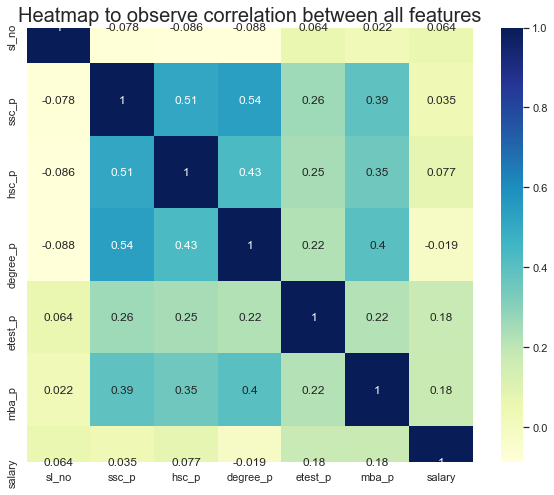

In [33]:

plt.subplots(figsize=(10,8))
plt.title('Heatmap to observe correlation between all features', fontsize=20)
sns.heatmap(df_placement.corr(), annot=True, cmap="YlGnBu");

#### Checking Missing Values

In [34]:
df_placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### There are only null values in the salary field for candidates that were not placed. Since they are not placed, their salary can be replaced with a 0.

In [35]:
df_placement = df_placement.fillna(0) 



In [36]:
df_placement.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#### Dropping the 'sl_no' Column as it adds no useful information to the dataset.

In [37]:
df_placement.drop(inplace=True, axis=1, labels=['sl_no'])

In [38]:
df_placement.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


#### Converting categorical columns to numeric using Label Encoder

In [39]:
enc = LabelEncoder()
df_placement.loc[:,['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']] = df_placement.loc[:,['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']].apply(enc.fit_transform)
df_placement.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


### Applying Logistic Regression to the dataset before doing feature selection.

In [40]:
X =df_placement.iloc[:,df_placement.columns != 'status' ]
Y =df_placement.status

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [42]:
logistic_regression = LogisticRegression()

In [43]:
logistic_regression.fit(X_train, Y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Calculating Accuracy

In [44]:
Y_pred = logistic_regression.predict(X_test) #predict y values with the model that was fit above
accuracy = metrics.accuracy_score(Y_test, Y_pred) #calculate accuracy of the prediction to actual values
accuracy_percentage = 100 * accuracy
print(accuracy_percentage)

100.0


In [45]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [46]:
cm = confusion_matrix( Y_test, Y_pred )
print(cm)

[[21  0]
 [ 0 44]]


#### Plotting Confusion Matrix

Text(0.5, 1.5, 'Confusion Matrix')

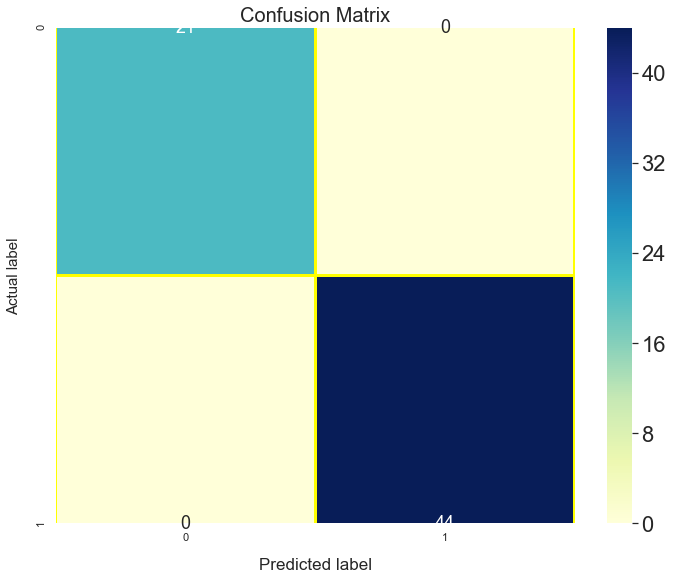

In [47]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(cm),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})


plt.tight_layout()

plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', fontsize=15,labelpad = 15)
plt.title('Confusion Matrix', fontsize=20, y= 1.5)

ROC score is: 1.0


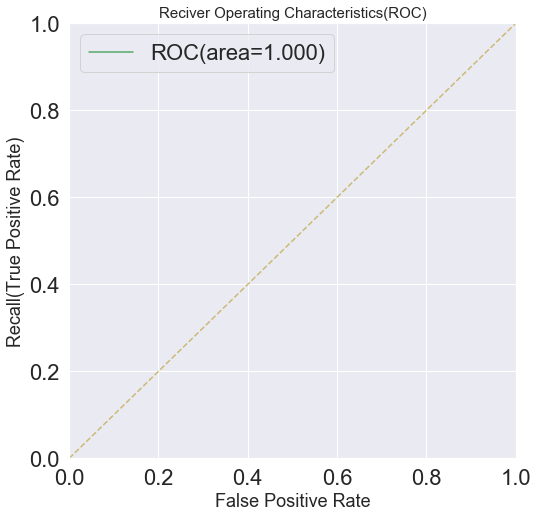

AUC: 1.0


In [48]:
log_roc_score = roc_auc_score(Y_test,Y_pred)
print('ROC score is:',log_roc_score)
plt.figure(figsize=(8,8))
false_positive_rate, recall, thresholds = roc_curve(Y_test,Y_pred)

roc_auc = auc(false_positive_rate,recall)

plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=15)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

### Feature Selection (for identifying important features from the dataset)

In [49]:
df_placement.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,0.071827,-0.173217,0.061345,0.085153,0.084294,-0.106160,-0.300531,0.090670,0.143110
ssc_p,-0.068969,1.000000,0.116194,0.511472,0.066996,0.236364,0.538404,0.205896,0.175675,0.261993,-0.172536,0.388478,0.607889,0.538090
ssc_b,0.019429,0.116194,1.000000,-0.137013,0.605883,0.050919,0.038070,0.100863,-0.040744,-0.018991,-0.051565,0.083120,0.037297,0.034594
hsc_p,-0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.164091,0.434206,-0.086450,0.141025,0.245113,-0.241630,0.354823,0.491228,0.452569
hsc_b,0.065945,0.066996,0.605883,-0.019548,1.000000,0.152227,0.067229,0.057960,0.038357,0.039108,0.002232,0.090201,0.016945,0.011544
hsc_s,0.071827,0.236364,0.050919,-0.164091,0.152227,1.000000,0.137276,0.596300,0.007856,0.075643,0.172107,0.039345,0.033442,0.058970
degree_p,-0.173217,0.538404,0.038070,0.434206,0.067229,0.137276,1.000000,0.079317,0.122648,0.224470,-0.218286,0.402364,0.479861,0.408371
degree_t,0.061345,0.205896,0.100863,-0.086450,0.057960,0.596300,0.079317,1.000000,0.105816,0.011509,0.084361,0.116666,-0.020352,0.053155
workex,0.085153,0.175675,-0.040744,0.141025,0.038357,0.007856,0.122648,0.105816,1.000000,0.056735,-0.191174,0.168811,0.276060,0.298285
etest_p,0.084294,0.261993,-0.018991,0.245113,0.039108,0.075643,0.224470,0.011509,0.056735,1.000000,-0.236315,0.218055,0.127639,0.186988


In [50]:
df_placement.corr()["status"].sort_values()

specialisation   -0.250655
degree_t         -0.020352
hsc_b             0.016945
hsc_s             0.033442
ssc_b             0.037297
mba_p             0.076922
gender            0.090670
etest_p           0.127639
workex            0.276060
degree_p          0.479861
hsc_p             0.491228
ssc_p             0.607889
salary            0.865774
status            1.000000
Name: status, dtype: float64

[0.01573856 0.14954707 0.01415589 0.06747952 0.01049801 0.01392735
 0.08951246 0.01497788 0.04477899 0.02315458 0.02794715 0.02816218
 0.50012035]


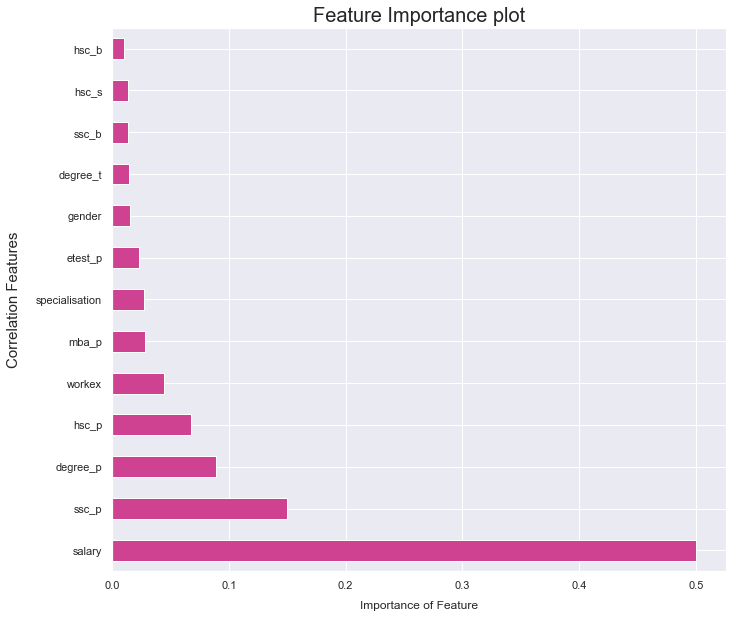

In [51]:
X =df_placement.iloc[:,df_placement.columns != 'status' ]
Y =df_placement.status
# feature extraction
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 

plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='PiYG')
plt.title("Feature Importance plot", fontsize=20)
plt.xlabel("Importance of Feature", fontsize=12, labelpad = 10)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);

feat = pd.Series(model.feature_importances_, index=X.columns)
feat.nlargest(27).plot(kind='barh')

plt.show()

In [52]:
df_placement.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

#### Dropping columns: salary, hsc_b, ssc_b, hsc_p

In [53]:
df_placement = df_placement.drop(columns = ['salary', 'ssc_b', 'hsc_b',
                     'hsc_p'], axis = 1)

In [54]:
df_placement.head(2)

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,2,77.48,2,1,86.5,0,66.28,1


### Logistic after feature selection

In [55]:
X = df_placement.drop(["status"], axis=1)
Y = df_placement["status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [56]:
logistic_regression = LogisticRegression()

In [57]:
logistic_model=logistic_regression.fit(X_train, Y_train)

In [58]:
Y_pred = logistic_regression.predict(X_test) #predict y values with the model that was fit above
accuracy = metrics.accuracy_score(Y_test, Y_pred) #calculate accuracy of the prediction to actual values
accuracy_percentage = 100 * accuracy
print(accuracy_percentage)

84.61538461538461


In [59]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.85      0.93      0.89        44

    accuracy                           0.85        65
   macro avg       0.84      0.80      0.81        65
weighted avg       0.84      0.85      0.84        65



In [60]:
newlogistic_cm = confusion_matrix( Y_test, Y_pred )
print(newlogistic_cm)

[[14  7]
 [ 3 41]]


In [61]:
#plot confusion matrix

#### ROC_AUC curve

ROC score is: 0.7992424242424242


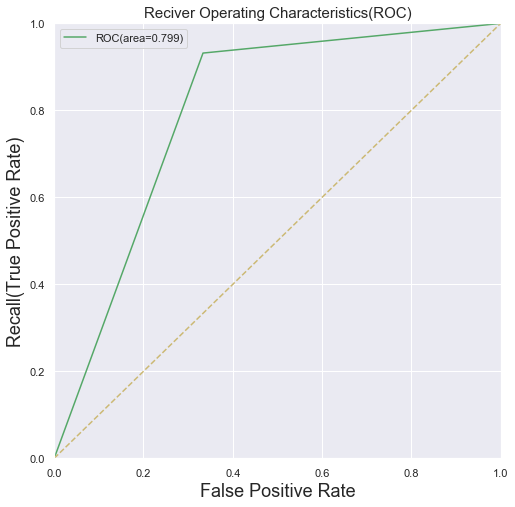

AUC: 0.7992424242424242


In [62]:

logistic_roc_score = roc_auc_score(Y_test,Y_pred)
print('ROC score is:',logistic_roc_score)
plt.figure(figsize=(8,8))
false_positive_rate, recall, thresholds = roc_curve(Y_test,Y_pred)

roc_auc = auc(false_positive_rate,recall)

plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=15)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

### Decision Tree

In [63]:
d_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
d_tree.fit(X_train, Y_train)
y_pred_1 = d_tree.predict(X_test)

In [64]:
print('Accuracy Score: {}'
      .format(accuracy_score(Y_test,y_pred_1)))

Accuracy Score: 0.7692307692307693


In [65]:
print(classification_report(Y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57        21
           1       0.78      0.91      0.84        44

    accuracy                           0.77        65
   macro avg       0.75      0.69      0.71        65
weighted avg       0.76      0.77      0.75        65



In [66]:
con_mat = confusion_matrix(Y_test, y_pred_1)
print(con_mat)

[[10 11]
 [ 4 40]]


ROC score is: 0.6926406926406926


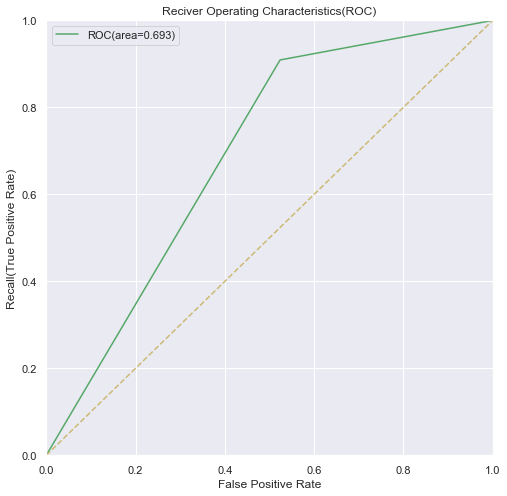

AUC: 0.6926406926406926


In [67]:
roc_score = roc_auc_score(Y_test,y_pred_1)
print('ROC score is:',roc_score)
plt.figure(figsize=(8,8))
false_positive_rate, recall, thresholds = roc_curve(Y_test,y_pred_1)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)')
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

### Random Forest

In [68]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit( X_train, Y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_pred_2 = random_forest.predict( X_test )

In [70]:
cm = confusion_matrix( Y_test, y_pred_2 )
print(cm)

[[12  9]
 [ 3 41]]


In [71]:
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print(cm)
print(classification_report(Y_test,y_pred_2))

Accuracy on Test Set for RandomForest = 0.82
[[12  9]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.82      0.93      0.87        44

    accuracy                           0.82        65
   macro avg       0.81      0.75      0.77        65
weighted avg       0.81      0.82      0.81        65



In [72]:
RF_score = cross_val_score( random_forest, X_train, Y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.2f" % (RF_score.mean()))

Mean RandomForest CrossVal Train Set Accuracy Mean: 0.83


ROC score is: 0.7516233766233765


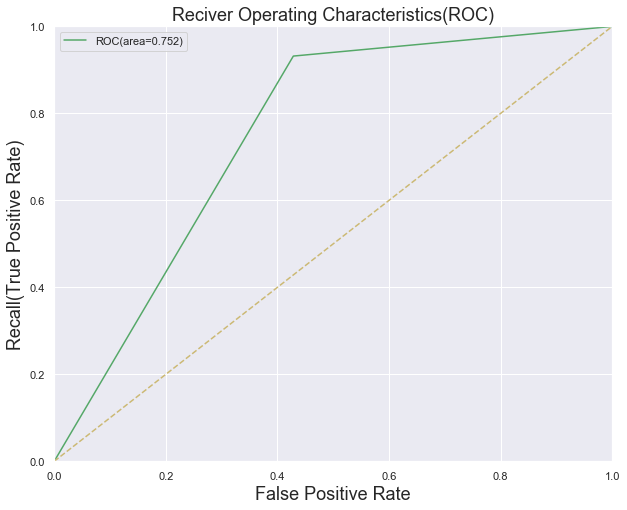

AUC: 0.7516233766233765


In [73]:
roc_score = roc_auc_score(Y_test,y_pred_2)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(Y_test,y_pred_2)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

### Testing

In [74]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRDac4CFDWJNNhneoj9XPhNp717BnWR8EFbLjl6d5163tYO7YqVuLJvt7e-OGVw2thm-A9URz8J9TwF/pub?gid=0&single=true&output=csv'
df_1 = pd.read_csv(data_path)



In [75]:
df_1.head()

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba
0,1,67.00,1,58,2,0,55.00,1,58.80
1,1,62.00,2,53,0,0,89.00,1,60.22
2,0,83.96,2,91,2,0,59.32,1,67.71
3,0,74.00,1,73,0,1,80.00,0,67.69
4,1,60.00,0,70,0,1,50.48,0,77.89


In [76]:
X_random = df_1
y_random = random_forest.predict(X_random)

#### Prediction for randomly selected samples

In [77]:
prediction_random = pd.DataFrame(random_forest.predict(X_random), columns = {'Prediction'}).set_index([pd.Index(X_random.index)])
samp_df = X_random.join(prediction_random)
samp_df

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba,Prediction
0,1,67.00,1,58,2,0,55.00,1,58.80,1
1,1,62.00,2,53,0,0,89.00,1,60.22,0
2,0,83.96,2,91,2,0,59.32,1,67.71,1
3,0,74.00,1,73,0,1,80.00,0,67.69,1
4,1,60.00,0,70,0,1,50.48,0,77.89,1


## Conclusion

1. Model gives 100% accuracy without Feature Selection.
2. The Accuracy is reduced to 85% after feature selection.
3. More than 50% of the students are placed.
4. The board of school education does not matter when it comes to placements or even salaries.
5. Majority of the students who score 80% in the employee ability test got a job.
6. Random Forest is the best model for this dataset to predict if a student will be placed or not.

### Recommended changes

In [78]:
data = {'gender':  [0],'ssc_p':  [75],'hsc_s':  [1],'degree_p':  [57],'degree_t':  [0],'workex':  [1],'etest_p':  [92.55],'specialisation':  [0],'mba_p':  [52.81]}

In [79]:
new_df = pd.DataFrame(data, columns = ['gender','ssc_p', 'hsc_s','degree_p', 'degree_t','workex','etest_p','specialisation','mba_p'])

In [80]:
y_pred_new= random_forest.predict(new_df)

#### Predicting the student will be placed or not

In [81]:
y_pred_new[0]

1

#### copy of original dataframe

In [82]:
df_placement2.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### dropping unwanted columns

In [83]:
df_placement2 = df_placement2.drop(columns = ['sl_no', 'ssc_b', 'hsc_b',
                     'hsc_p'], axis = 1)

In [84]:
df_placement2.head(3)

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


#### converting categorical columns to numeric using label encoder

In [85]:
enc = LabelEncoder()
df_placement2.loc[:,['gender','hsc_s','degree_t','workex','specialisation','status']] = df_placement2.loc[:,['gender','hsc_s','degree_t','workex','specialisation','status']].apply(enc.fit_transform)
df_placement2.head(5)

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,2,52.00,2,0,66.0,1,59.43,0,NaN
4,1,85.80,1,73.30,0,0,96.8,0,55.50,1,425000.0


#### selecting only the placed students

In [86]:
df_placement2= df_placement2[df_placement2['status']== 1]
df_placement2.head(5)

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,85.80,1,73.30,0,0,96.8,0,55.50,1,425000.0
7,1,82.00,2,66.00,2,1,67.0,0,62.14,1,252000.0


#### dropping status column (it doesnot contribute to the model since value will always be 1)

In [87]:
df_placement2 = df_placement2.drop(columns = ['status'], axis = 1)

In [88]:
df_placement2.head()

,gender,ssc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,1,58.00,2,0,55.0,1,58.80,270000.0
1,1,79.33,2,77.48,2,1,86.5,0,66.28,200000.0
2,1,65.00,0,64.00,0,0,75.0,0,57.80,250000.0
4,1,85.80,1,73.30,0,0,96.8,0,55.50,425000.0
7,1,82.00,2,66.00,2,1,67.0,0,62.14,252000.0


#### Training linear regressor to predict the salary of placed students.

In [89]:
X = df_placement2.drop(["salary"], axis=1)
Y = df_placement2["salary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [90]:
lin_reg_mod = LinearRegression()

In [91]:
lin_reg_mod.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Creating a dummy student record for predicting the salary

In [92]:
data_1 = {'gender':  [0],'ssc_p':  [75],'hsc_s':  [1],'degree_p':  [57],'degree_t':  [0],'workex':  [1],'etest_p':  [92.55],'specialisation':  [0],'mba_p':  [52.81]}

In [93]:
new_data_1 = pd.DataFrame(data_1, columns = ['gender','ssc_p', 'hsc_s','degree_p', 'degree_t','workex','etest_p','specialisation','mba_p'])

In [94]:
pred_new = lin_reg_mod.predict(new_data_1)

#### Predicting the salary of the dummy student (in rupees)

In [95]:
print(pred_new)

[259775.93887492]


#### conclusion 
1. The above model can be used by a salary predictor app. 
2. The model will require a student to enter his/her details as required and it will predict whether the student will be placed or not and if placed, the model will further detrermine the salary of the student.
3. The two models can be chained together to form a salary predictor app.

Suppose a student enters the following details:

gender: Female,
ssc_p: 75%,
hsc_s: Commerce,
degree_p: 57%,
degree_t: Commerce and management,
workex: yes,
etest_p: 92.55%,
specialisation:Marketing and Finance,
mba_p: 52.81%

The model predicts that the student will be placed and further predicts the student's salary to be Rs.2,59,775.